In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df=pd.read_csv("C:/Users/JHANANISHRI/Downloads/house_price_tree.csv")

                                            DATA PREPROCESSING

In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size_m2         150 non-null    float64
 1   bedrooms        150 non-null    int64  
 2   location_score  150 non-null    float64
 3   price_category  150 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.8+ KB
None


In [105]:
print(df.describe())


          size_m2    bedrooms  location_score
count  150.000000  150.000000      150.000000
mean   119.323333    3.126667        5.250667
std     45.110679    1.396528        2.475023
min     40.500000    1.000000        1.100000
25%     80.300000    2.000000        3.200000
50%    121.000000    3.000000        5.100000
75%    156.725000    4.000000        7.200000
max    198.900000    5.000000        9.900000


In [106]:
df.isnull().sum()

size_m2           0
bedrooms          0
location_score    0
price_category    0
dtype: int64

In [107]:
df.columns 

Index(['size_m2', 'bedrooms', 'location_score', 'price_category'], dtype='object')

In [108]:
df.dtypes

size_m2           float64
bedrooms            int64
location_score    float64
price_category     object
dtype: object

In [109]:
df.duplicated

<bound method DataFrame.duplicated of      size_m2  bedrooms  location_score price_category
0       90.6         5             3.8         Medium
1       70.1         2             6.0            Low
2      129.1         5             3.7         Medium
3      170.8         1             9.0           High
4      177.3         5             5.1           High
..       ...       ...             ...            ...
145    145.7         1             4.4         Medium
146     85.1         2             6.6         Medium
147    162.8         1             6.2           High
148    110.0         5             3.7         Medium
149    176.5         3             9.9           High

[150 rows x 4 columns]>

In [110]:
df.head()

,size_m2,bedrooms,location_score,price_category
0,90.6,5,3.8,Medium
1,70.1,2,6.0,Low
2,129.1,5,3.7,Medium
3,170.8,1,9.0,High
4,177.3,5,5.1,High


                                                          price distibution

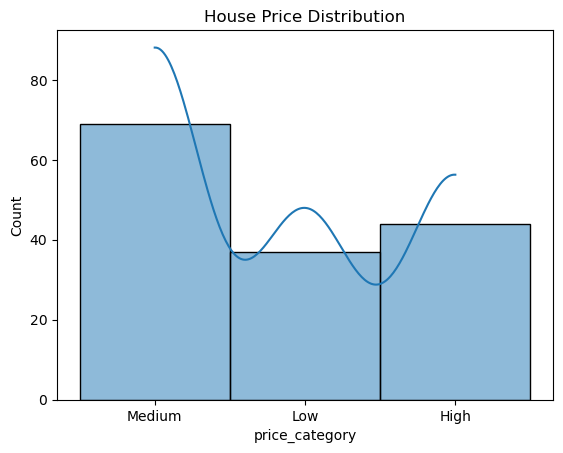

In [111]:
sns.histplot(df["price_category"],kde=True)
plt.title("House Price Distribution")
plt.show()

                                                              Training

In [141]:
X = df.drop("price_category", axis=1)
y = df["price_category"]

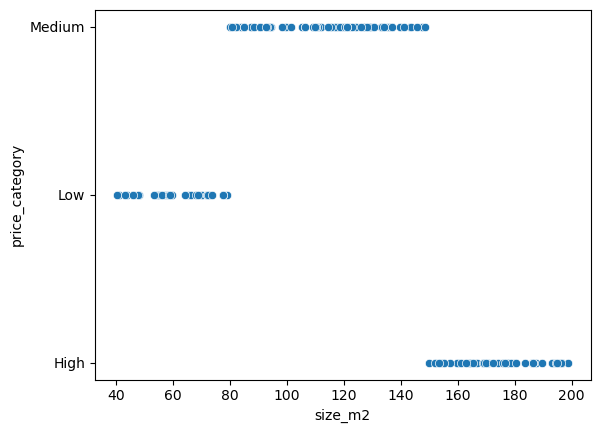

In [142]:
sns.scatterplot(x="size_m2", y="price_category", data=df)
plt.show()

In [120]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [121]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9


In [123]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n ", cm)

Confusion Matrix
  [[ 5  0  0]
 [ 0 10  1]
 [ 2  0 12]]


In [132]:
feature_importances = pd.DataFrame({"Feature": X.columns,"Importance": dt.feature_importances_}).sort_values(by="Importance", ascending=False)
print("Feature Importances:\n", feature_importances)

Feature Importances:
           Feature  Importance
0         size_m2         1.0
1        bedrooms         0.0
2  location_score         0.0


In [139]:
sample_input = [[120, 3, 7.5]]
print("Prediction for (120, 3, 7.5):", dt.predict(sample_input)[0])

Prediction for (120, 3, 7.5): Medium


C:\Users\JHANANISHRI\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [140]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)
print("Mean Squared Error:", mean_squared_error(y_test_encoded, y_pred_encoded))
print("Mean Absolute Error:", mean_absolute_error(y_test_encoded, y_pred_encoded))
print("R2 Score:", r2_score(y_test_encoded, y_pred_encoded))

Mean Squared Error: 0.3
Mean Absolute Error: 0.16666666666666666
R2 Score: 0.4478527607361962


In [4]:
#import pickle
#with open("house_price_model.pkl", "wb") as f:
    #pickle.dump(model,f)